In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../data/instances.json')
df = df.transpose()
df

,error,uri,title,short_description,description,email,version,urls,stats,thumbnail,...,thumbnail_description,feature_quote,description_source,login_message,post_character_limit,blockchains,ipfs_gateway_url,fedibird_capabilities,usage,media_attachments
peertube.livingutopia.org,400 Client Error: Bad Request for url: https:/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
social.fingerprintsoftware.ca,NaN,https://social.fingerprintsoftware.ca,Fingerprint Software Friendica Node,,,jonathan@fingerprintsoftware.ca,2.8.0 (compatible; Friendica 2023.01),None,"{'user_count': 0, 'status_count': 0, 'domain_c...",https://social.fingerprintsoftware.ca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
friendica.dupreez.id.au,HTTPSConnectionPool(host='friendica.dupreez.id...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zerojanvier.fr,"HTTPSConnectionPool(host='zerojanvier.fr', por...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lazybear.io,404 Client Error: Not Found for url: https://l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mastodon.mashi.ro,"HTTPSConnectionPool(host='mastodon.mashi.ro', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pix.social.synesthesia.co.uk,HTTPSConnectionPool(host='pix.social.synesthes...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mastodon.ngen15.tv,"HTTPSConnectionPool(host='mastodon.ngen15.tv',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
social.openinfra.dev,HTTPSConnectionPool(host='social.openinfra.dev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# count error, real instances and error type
# number of user per instance, toots

46281 11997


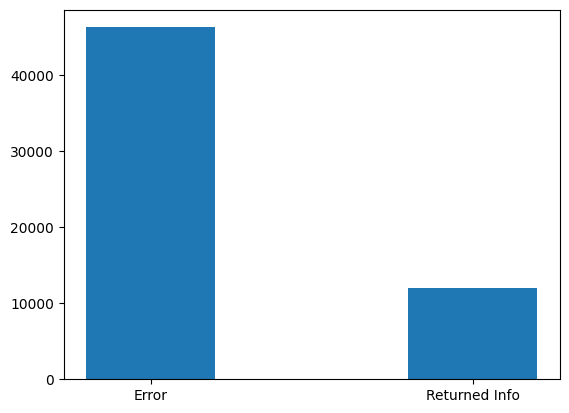

In [4]:
plt.bar(['Error', 'Returned Info'], [df['error'].count(), df['uri'].count()], width = 0.4)
print(df['error'].count(), df['uri'].count())
plt.show()

In [5]:
errors = {}

nonan = df['error'].dropna()

errors['HTTPSConnectionPool'] = nonan.str.contains('HTTPSConnectionPool').sum()
errors['Connection aborted.'] = nonan.str.contains('Connection aborted.').sum()
errors['400'] = nonan.str.contains('400 Client Error').sum()
errors['404'] = nonan.str.contains('404 Client Error').sum()
errors['526'] = nonan.str.contains('526').sum()
errors['502'] = nonan.str.contains('502').sum()
errors['503'] = nonan.str.contains('503').sum()
errors['401'] = nonan.str.contains('401').sum()
errors['403'] = nonan.str.contains('403').sum()
errors['Expecting value'] = nonan.str.contains('Expecting value').sum()
errors['Expecting value']

918

In [6]:
nonan[(~nonan.str.contains("HTTPSConnectionPool")) & (~nonan.str.contains("502")) & (~nonan.str.contains("503")) & (~nonan.str.contains("403")) & (~nonan.str.contains("404")) & (~nonan.str.contains("526")) & (~nonan.str.contains("401")) & (~nonan.str.contains("400"))].iloc[0]

'Expecting value: line 6 column 3 (char 7)'

In [7]:
nonan[nonan.str.contains("TTPSConnectionPool")].iloc[5]

"HTTPSConnectionPool(host='gnusocial.tamanoir.foucry.net', port=443): Max retries exceeded with url: /api/v1/instance (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f08b004ff10>: Failed to establish a new connection: [Errno 111] Connection refused'))"

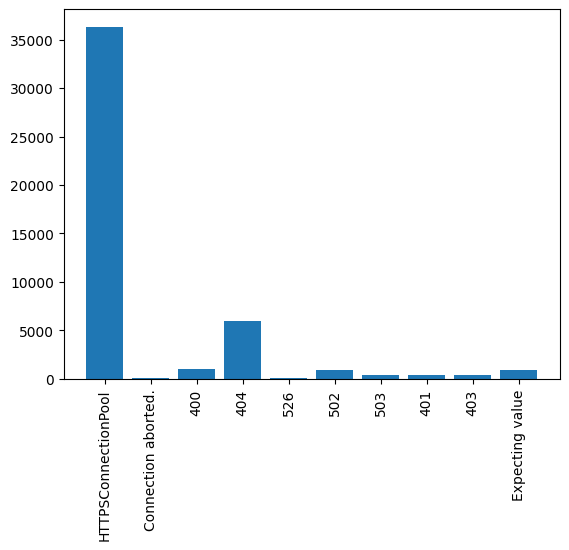

In [23]:
plt.bar(list(errors.keys()), list(errors.values()))
plt.xticks( rotation= 90)
plt.show()

#  HTTPSConnectionPool: Max retries exceeded with url => trying them manually leads to error as well OR they could 
# could be hosted in the same server and I exceed the number of requests there

#capire errore 


# 400 => bad request, seems like like that function wasn't implemented
# 404 => Not implemented

In [9]:
nonanstats = df.stats.dropna()
user_count = nonanstats.apply(lambda x : (eval(str(x))['user_count']))
status_count = nonanstats.apply(lambda x : (eval(str(x))['status_count']))
domain_count = nonanstats.apply(lambda x : (eval(str(x)).get('domain_count')))

mastodon.social        1032973
pawoo.net               847852
switter.at              435490
gamethattune.club       300966
baraag.net              293859
mastodon.cloud          247604
soc.jae.fi              247204
mk.anarchyfox.space     198487
mstdn.social            193819
www.foxyhole.io         186087
Name: stats, dtype: int64


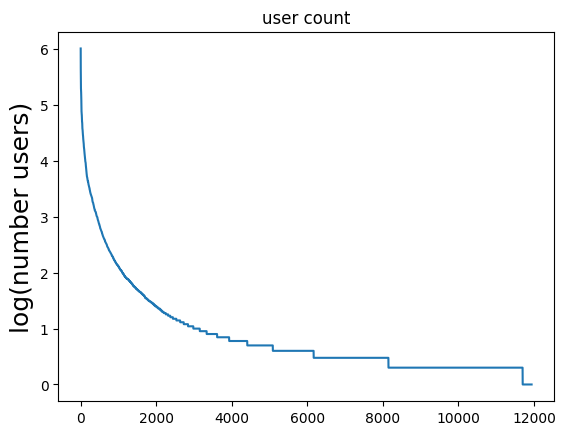

In [10]:
user_count = user_count.dropna().apply(lambda x : int(x))
user_count = user_count.sort_values(ascending= False)
plt.plot(np.emath.logn(10, user_count +1))
plt.title('user count')
plt.ylabel('log(number users)', fontsize=18)
print(user_count.iloc[:10])
plt.show()

mastodon.social        1032973
pawoo.net               847852
switter.at              435490
gamethattune.club       300966
baraag.net              293859
mastodon.cloud          247604
soc.jae.fi              247204
mk.anarchyfox.space     198487
mstdn.social            193819
www.foxyhole.io         186087
Name: stats, dtype: int64


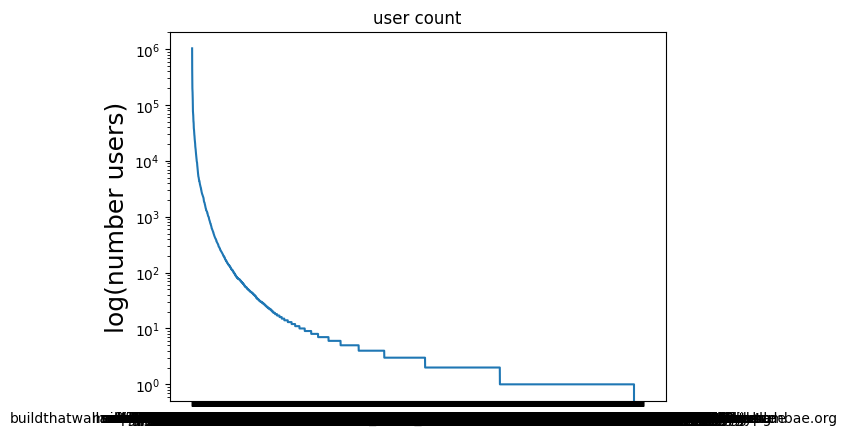

In [17]:
user_count = user_count.dropna().apply(lambda x : int(x))
user_count = user_count.sort_values(ascending= False)
plt.semilogy(user_count)
plt.title('user count')
plt.ylabel('log(number users)', fontsize=18)
print(user_count.iloc[:10])
plt.show()

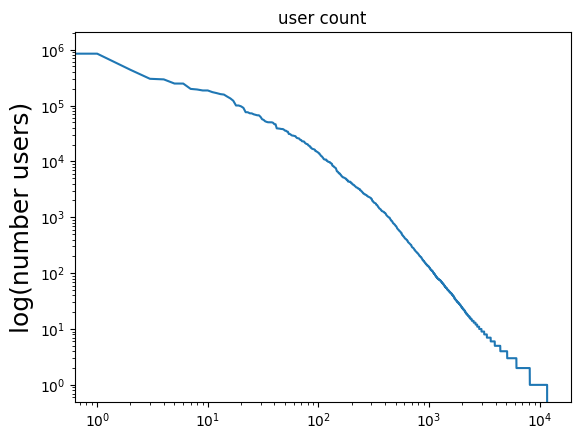

In [20]:
user_count = user_count.dropna().apply(lambda x : int(x))
user_count = user_count.sort_values(ascending= False)
plt.loglog(user_count.values)
plt.title('user count')
plt.ylabel('log(number users)', fontsize=18)

plt.show()

/home/stefano/anaconda3/lib/python3.9/site-packages/numpy/lib/scimath.py:377: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)/nx.log(n)
/home/stefano/anaconda3/lib/python3.9/site-packages/numpy/lib/scimath.py:377: RuntimeWarning: invalid value encountered in true_divide
  return nx.log(x)/nx.log(n)
/home/stefano/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


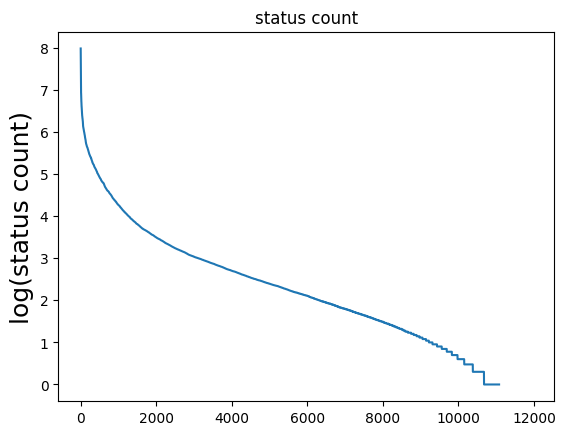

In [100]:
status_count = status_count.dropna().apply(lambda x : int(x))
status_count = status_count.sort_values(ascending= False)
plt.plot(np.emath.logn(10, status_count))
plt.title('status count')
plt.ylabel('log(status count)', fontsize=18)
plt.show()

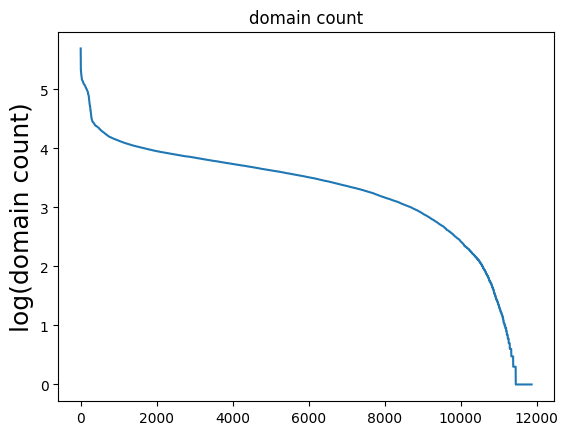

In [98]:
domain_count = domain_count.dropna().apply(lambda x : int(x))
domain_count = domain_count.sort_values(ascending= False)
plt.plot(np.emath.logn(10, domain_count+1))
plt.title('domain count')
plt.ylabel('log(domain count)', fontsize=18)
plt.show()

# 

In [12]:
df = pd.read_json('../data/users.json')
df = df.transpose()
df

,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,...,statuses_count,last_status_at,noindex,emojis,roles,fields,suspended,moved,limited,role
https://mastodon.social/@Gargron,1,Gargron,Gargron,Eugen Rochko,False,False,True,False,2016-03-16T00:00:00.000Z,"<p>Founder, CEO and lead developer <span class...",...,73481,2023-03-30,False,[],[],"[{'name': 'Patreon', 'value': '<a href=""https:...",NaN,NaN,NaN,NaN
https://mastodon.social/@thedextriarchy,225094,thedextriarchy,thedextriarchy,Adi Robertson,False,False,True,False,2017-11-02T00:00:00.000Z,"<p>Senior tech &amp; policy editor, The Verge</p>",...,556,2023-04-11,False,[],[],"[{'name': 'Twitter', 'value': '<a href=""https:...",NaN,NaN,NaN,NaN
https://mastodon.online/@darth,110103726548873661,darth,darth@mastodon.online,darth™,False,False,True,False,2023-03-28T00:00:00.000Z,<p>not the darth u are looking for</p>,...,92,2023-04-11,NaN,[],NaN,[],NaN,NaN,NaN,NaN
https://mastodon.online/@justinling,109291667985123090,justinling,justinling@mastodon.online,Justin Ling🆒️,False,False,True,False,2022-04-29T00:00:00.000Z,<p>Freelance investigative journalist — nation...,...,394,2023-04-11,NaN,[],NaN,"[{'name': 'Website', 'value': '<a href=""https:...",NaN,NaN,NaN,NaN
https://c18.masto.host/@grubstreetwomen,110098523946534892,grubstreetwomen,grubstreetwomen@c18.masto.host,Kate Ozment,False,False,True,False,2023-03-28T00:00:00.000Z,"<p>Assistant professor of English; <a href=""ht...",...,19,2023-04-10,NaN,[],NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://mastodon.xyz/@Ashkendo,109741032897278411,Ashkendo,Ashkendo@mastodon.xyz,Ash Doyle,False,False,True,False,2017-04-04T00:00:00.000Z,"<p>introvert, IT worker, amateur/wannabe comic...",...,1478,2023-04-10,NaN,[],NaN,"[{'name': 'Location', 'value': 'Wilson, NC', '...",NaN,NaN,NaN,NaN
https://hachyderm.io/@collinbanko,109741031015998392,collinbanko,collinbanko@hachyderm.io,Collin Banko,False,False,True,False,2022-11-22T00:00:00.000Z,<p>Virtual Production Pipeline Engineer with L...,...,0,None,NaN,[],NaN,"[{'name': 'Pronouns', 'value': 'he/him/his', '...",NaN,NaN,NaN,NaN
https://starside.social/@beorn,109741022459884162,beorn,beorn@starside.social,Michael Lake,False,False,True,False,2022-12-19T00:00:00.000Z,"<p><a href=""https://starside.social/tags/NorCa...",...,98,2023-04-02,NaN,"[{'shortcode': 'jaderabbit', 'url': 'https://i...",NaN,"[{'name': 'Photography', 'value': '<a href=""ht...",NaN,NaN,NaN,NaN
https://mastodon.social/@shourijo,109740932000090188,shourijo,shourijo@mastodon.social,,False,False,False,False,2018-08-23T00:00:00.000Z,,...,0,None,NaN,[],NaN,[],NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['id', 'username', 'acct', 'display_name', 'locked', 'bot',
       'discoverable', 'group', 'created_at', 'note', 'url', 'avatar',
       'avatar_static', 'header', 'header_static', 'followers_count',
       'following_count', 'statuses_count', 'last_status_at', 'noindex',
       'emojis', 'roles', 'fields', 'suspended', 'moved', 'limited', 'role'],
      dtype='object')

https://mastodon.adtension.com/@admin    97000000138
https://mastodon.social/@Mastodon             760720
https://universeodon.com/@georgetakei         362786
https://mastodon.social/@Gargron              304814
https://mastodon.social/@neilhimself          239698
https://masto.ai/@rbreich                     218880
https://mstdn.social/@feditips                178867
https://edi.social/@janboehm                  177774
https://mastodon.social/@taylorlorenz         154765
https://mstdn.social/@stux                    121399
Name: followers_count, dtype: int64


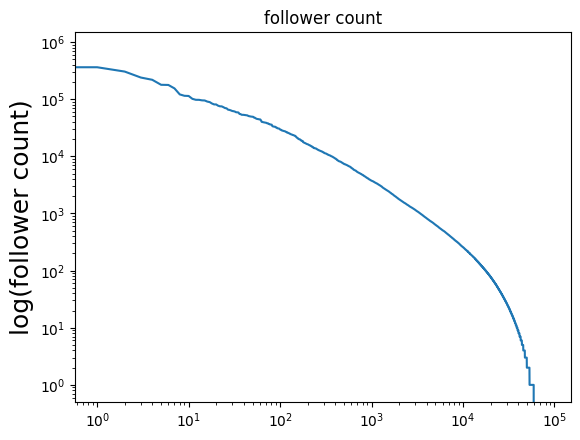

In [27]:
fol = df.followers_count.apply(lambda x : int(x))
fol = fol.sort_values(ascending= False)

plt.loglog(fol.iloc[1:].values)
plt.title('follower count')
plt.ylabel('log(follower count)', fontsize=18)
print(fol.iloc[:10])
plt.show()

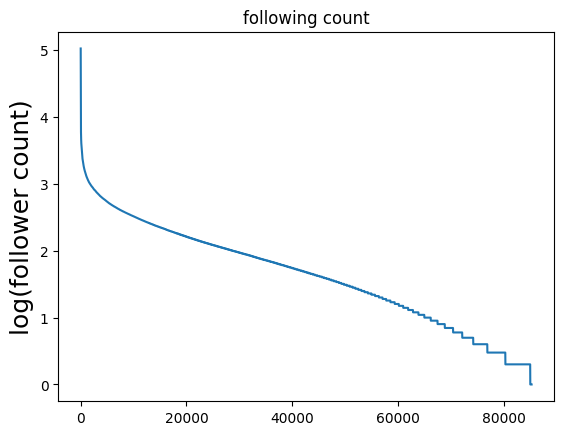

In [15]:
fol = df.following_count.apply(lambda x : int(x))
fol = fol.sort_values(ascending= False)
plt.plot(np.emath.logn(10, fol +1))
plt.title('following count')
plt.ylabel('log(follower count)', fontsize=18)
plt.show()

In [106]:
df.bot.count() # no bot


85268

In [ ]:
# prossimi step
# parallelizzare richiesta id per rendere più veloce la richiesta di follower
# cercare papers per vedere se qualcuno ha già risorto questi problemi
# riscrivere il codice
# titolo application